### 서울시(부산시)의 구별 인구 및 CCTV 현황분석

- 적절한 설치 비율을 통계를 통해 시각화
- 평균이동선을 구현
- pandas 사용(기본 사용법)
- matplotlib.plt 


In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 로드
# 윈도우 경우 파일명이 한글이면 읽지 못하는 경우가 있다.
# 혹은 문서 인코딩이 달라서 못 읽는 경우도 있다.

s_cctv = pd.read_csv('./data/seoul_cctv.csv',encoding='utf-8')

In [3]:
# 데이터가 로드 되었으면 시작값과 끝값을 확인
s_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
s_cctv.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [5]:
s_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
# 컬럼명 : '2013년도 이전'
s_cctv.columns[2]

'2013년도 이전'

In [7]:
# 인덱스
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [8]:
type(s_cctv)

pandas.core.frame.DataFrame

In [9]:
# 특정 인덱스
s_cctv.index[1]

1

In [10]:
# 컬럼명 : '기관명' => '자치구'
dic = {s_cctv.columns[0]:'자치구'}
s_cctv.rename(columns = dic, inplace = True)  # 사본 작업 but inplace = True 면 원본에 적용하라.
#reindex =>행 rename =>열

In [11]:
s_cctv.columns
s_cctv.head(1)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [12]:
# 인구 현황 로드하기 s_pop

s_pop = pd.read_excel('./data/Report.xls',encoding='utf-8')

In [13]:
s_pop.head(20)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.2/4,합계,4241547,10089517,4935944,5153573,9814049,4802769,5011280,275468,133175,142293,2.31,1393671
3,2018.2/4,종로구,73655,163569,79522,84047,153780,75247,78533,9789,4275,5514,2.09,26512
4,2018.2/4,중구,61091,135427,66673,68754,126032,62260,63772,9395,4413,4982,2.06,21798
5,2018.2/4,용산구,108516,245245,119963,125282,229677,111078,118599,15568,8885,6683,2.12,37331
6,2018.2/4,성동구,135666,316068,155268,160800,308066,151571,156495,8002,3697,4305,2.27,42171
7,2018.2/4,광진구,161294,370519,179621,190898,355748,173216,182532,14771,6405,8366,2.21,44806
8,2018.2/4,동대문구,160757,364527,180126,184401,348903,174128,174775,15624,5998,9626,2.17,56675
9,2018.2/4,중랑구,179690,410296,203711,206585,405551,201803,203748,4745,1908,2837,2.26,60618


- 컬럼쪽이 원데이터에서 셀 병합이 되어 있어서 불필요하게 2개가 더 들어갔다.
> 제거필요
- 데이터 중에 필요하지 않는 부분(남여구분, 기간 등은 필요 없다.)
- 총인구, 한국총인구수, 외국인 총 인구수, 64세이상 총 인구수, 자치구만 로드


In [14]:
# header = '몇번째 행부터 읽을 것인가?'
# usecols = '로드한 엑셀의 컬러명 열기'
s_pop = pd.read_excel('./data/Report.xls',encoding='utf-8',header = 2, usecols='B, D, G, J, N')

In [15]:
s_pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [16]:
#계 = >인구수 1 => 한국인, 2 => 외국인, 65세아싱 고령자 => 고령자 컬럼명 변경
dic = {s_pop.columns[1]:'인구수',s_pop.columns[2]:'한국인',s_pop.columns[3]:'외국인',s_pop.columns[4]:'고령자'}
s_pop.rename(columns=dic,inplace=True)

### pandas 기초 학습 하기

In [17]:
# 데이터 확인
s_cctv.head(2)


,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [18]:
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [19]:
# s_cctv 데이터에서 소계 컬럼을 기준으로 오름차순 정렬
s_cctv.sort_values('소계').head(3)


,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174


In [20]:
s_cctv.sort_values('소계',ascending=False).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398


- cctv 집계수를 보고 여러 가설들이 발생될 수 있다.
- 해당 자치구의 주거 지역/상업지역/지하철(교통요인) 부분도 고려되면 좋겠다는 생각이 든다.
- 주거 지역은 cctv가 적고, 상업 지역은 많아보인다.
- 2013년도 이전 데이터 대비 3년간 증가된 cctv 수에 대한 증가율을 살펴볼 필요가 있다.
- 최근 3년간 증가율 = (2014+2015+2016) / 2013 * 100
- 최근 증가율이라는 컬럼명을 추가하시오.

In [21]:
s_cctv.columns

Index(['자치구', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [22]:
s_cctv['최근 증가율'] = (s_cctv['2014년']+s_cctv['2015년']+\
                    s_cctv['2016년'])/s_cctv['2013년도 이전']

In [23]:
s_cctv['최근 증가율']= s_cctv['최근 증가율']*100

In [24]:
s_cctv.rename({'최근 증가율':'최근 증가율(%)'},axis = 1, inplace=True)

In [25]:
s_cctv

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율(%)
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


In [26]:
# 데이터 프레임의 컬럼
# 데이터의 순서가 동일하고 향후 년도 데이터만 추가된다는 전제

s_cctv.columns[3:]

Index(['2014년', '2015년', '2016년', '최근 증가율(%)'], dtype='object')

In [27]:
# 사본 결과, 해당 컬럼 데이터만 나온다.
s_cctv[s_cctv.columns[3:]].cumsum(axis = 1)

,2014년,2015년,2016년,최근 증가율(%)
0,430.0,1014.0,1946.0,2096.619195
1,99.0,254.0,631.0,797.490765
2,120.0,258.0,462.0,587.203252
3,258.0,442.0,523.0,657.793814
4,260.0,650.0,1263.0,1412.290780
5,78.0,131.0,305.0,358.228621
6,173.0,419.0,742.0,806.973730
7,51.0,320.0,674.0,774.000000
8,57.0,508.0,1024.0,1212.929889
9,159.0,201.0,587.0,833.638655


In [28]:
# 2016년도 데이터만(누적합의 데이터가 모인 곳)
tmp = s_cctv[s_cctv.columns[3:]].cumsum(axis = 1)[s_cctv.columns[-1]]

In [29]:
s_cctv['최근 증가율2(%)'] = s_cctv.loc[:,'2014년':'2016년'].sum(axis=1)/s_cctv['2013년도 이전']*100
s_cctv['최근 증가율3(%)'] = tmp / s_cctv[s_cctv.columns[2]]*100

In [30]:
s_cctv

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율(%),최근 증가율2(%),최근 증가율3(%)
0,강남구,3238,1292,430,584,932,150.619195,150.619195,162.277027
1,강동구,1010,379,99,155,377,166.490765,166.490765,210.419727
2,강북구,831,369,120,138,204,125.203252,125.203252,159.133673
3,강서구,911,388,258,184,81,134.793814,134.793814,169.534488
4,관악구,2109,846,260,390,613,149.290780,149.290780,166.937444
5,광진구,878,573,78,53,174,53.228621,53.228621,62.518084
6,구로구,1884,1142,173,246,323,64.973730,64.973730,70.663199
7,금천구,1348,674,51,269,354,100.000000,100.000000,114.836795
8,노원구,1566,542,57,451,516,188.929889,188.929889,223.787802
9,도봉구,825,238,159,42,386,246.638655,246.638655,350.268343


In [31]:
# 더미 데이터 제거
try:
    del s_cctv['최근 증가율2(%)'] 
except Exception as e:
    print(e)

In [32]:
s_cctv

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율(%),최근 증가율3(%)
0,강남구,3238,1292,430,584,932,150.619195,162.277027
1,강동구,1010,379,99,155,377,166.490765,210.419727
2,강북구,831,369,120,138,204,125.203252,159.133673
3,강서구,911,388,258,184,81,134.793814,169.534488
4,관악구,2109,846,260,390,613,149.290780,166.937444
5,광진구,878,573,78,53,174,53.228621,62.518084
6,구로구,1884,1142,173,246,323,64.973730,70.663199
7,금천구,1348,674,51,269,354,100.000000,114.836795
8,노원구,1566,542,57,451,516,188.929889,223.787802
9,도봉구,825,238,159,42,386,246.638655,350.268343


### 인구 현황 분석

In [33]:
s_pop.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [34]:
# 0번 행 제거
s_pop.drop([0], inplace= True)
s_pop.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171
5,광진구,370519,355748,14771,44806


In [35]:
# 데이터 프레임의 고유값, 키로 검토중인 => 자치구
# 고유항 검사
s_pop['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [36]:
s_pop.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [37]:
len(s_pop['자치구'].unique())
# 행의 개수와 자치구 컬럼데이터의 중복제거 후 개수가 동일 함으로 고유하다.

25

In [38]:
# NaN이 있을 경우 제거해야한다. 혹은 보간 (주식)
# Nan 데이터 추출
s_pop['자치구'].isnull(),s_pop['자치구'].isnull().any()
# 하나라도 참이 있는가?
# 결측값 False

(1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 Name: 자치구, dtype: bool, False)

In [39]:
# 체크 방법2
type(s_pop[s_pop['자치구'].isnull()].index),type(s_pop['자치구'].isnull())
s_pop[s_pop['자치구'].isnull()].index
#s_pop['자치구'].isnull()

Int64Index([], dtype='int64')

In [40]:
# Nan이 존재하면 해당 행을 모두 제거해라
s_pop.drop(s_pop[s_pop['자치구'].isnull()].index)

################################### 강사님 코드 ###############################################
if s_pop['자치구'].isnull().any():
    s_pop.drop([s_pop[s_pop['자치구'].isnull()].index], inplace =True)
    prinit('nan제거됨')
##############################################################################################


In [41]:
# 전체 인구 대비 외국인 비율, 고령자 비율 = 고령자 / 인구수 * 100 계산 추가
# 고령자 비율 = 고령자 / 인구수 * 100

s_pop['외국인비율'] = s_pop['외국인'] / s_pop['인구수'] * 100
s_pop['고령자비율'] = s_pop['고령자'] / s_pop['인구수'] * 100
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756


In [42]:
# 외국인 비율 기준 내림차순 정렬해서 샘플로 2개 출력
s_pop.sort_values(by = '외국인비율', ascending = False).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,54994,8.775751,13.595516
18,금천구,252752,233263,19489,34945,7.710720,13.825806


In [43]:
s_pop.sort_values(by = '고령자비율', ascending = True).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673161,666439,6722,79093,0.998572,11.749492
23,강남구,551888,546952,4936,66011,0.894384,11.960941


### 데이터 병합
- 인구대비 CCTV 주제를 분석하기 위해서
- 개별 데이터프레임을 하나로 합쳐야 한다.

In [44]:
s_cctv,s_pop
# 교집합
data_result = pd.merge(s_cctv, s_pop, on = '자치구')
data_result

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,210.419727,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,369,120,138,204,125.203252,159.133673,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,388,258,184,81,134.793814,169.534488,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,846,260,390,613,149.290780,166.937444,521960,504048,17912,71317,3.431681,13.663308
5,광진구,878,573,78,53,174,53.228621,62.518084,370519,355748,14771,44806,3.986570,12.092767
6,구로구,1884,1142,173,246,323,64.973730,70.663199,440305,407235,33070,60564,7.510703,13.755011
7,금천구,1348,674,51,269,354,100.000000,114.836795,252752,233263,19489,34945,7.710720,13.825806
8,노원구,1566,542,57,451,516,188.929889,223.787802,553177,549365,3812,75741,0.689110,13.692001
9,도봉구,825,238,159,42,386,246.638655,350.268343,344096,341928,2168,54969,0.630057,15.974902


In [45]:
try:
    del data_result['2013년도 이전']
    del data_result['2014년']
    del data_result['2015년']
    del data_result['2016년']
except Exception as e:
    print(e)

In [46]:
data_result.head(2)

,자치구,소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,210.419727,437050,432749,4301,57680,0.984098,13.197575


In [49]:
data_result.rename(columns={'소계':'cctv 소계'}, inplace = True)
data_result

,자치구,cctv 소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,210.419727,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,125.203252,159.133673,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,134.793814,169.534488,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,149.290780,166.937444,521960,504048,17912,71317,3.431681,13.663308
5,광진구,878,53.228621,62.518084,370519,355748,14771,44806,3.986570,12.092767
6,구로구,1884,64.973730,70.663199,440305,407235,33070,60564,7.510703,13.755011
7,금천구,1348,100.000000,114.836795,252752,233263,19489,34945,7.710720,13.825806
8,노원구,1566,188.929889,223.787802,553177,549365,3812,75741,0.689110,13.692001
9,도봉구,825,246.638655,350.268343,344096,341928,2168,54969,0.630057,15.974902


In [51]:
# 인덱스가 단순히 0 시작하는 의미없는 숫자이다.
# 2차원 시각화 할때 (x좌표(좌우),y좌표(상하))
# 키로 사용한 그리고, 고유한 값을 가진 칼럼(자치구)를 인덱스로 변경

data_result.set_index('자치구', inplace = True)


In [55]:
data_result.head(2)

,cctv 소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,210.419727,437050,432749,4301,57680,0.984098,13.197575


In [54]:
## CCTV 소계 대비 인구수 : 고령자 비율, 외국인 비율이던 상관 있는지 체크
# 상관계수 0.1 이하 : 무시
# abs(0.3) 이하 : 약한 상관관계
# abs(0.7) 이하 : 뚜렷한 상관관계
# np.correct() : 상관 계수 계산 함수
np.corrcoef(data_result['인구수'],data_result['cctv 소계'])


array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

In [56]:
np.corrcoef(data_result['한국인'],data_result['cctv 소계'])

array([[1.        , 0.22074034],
       [0.22074034, 1.        ]])

In [57]:
np.corrcoef(data_result['외국인'],data_result['cctv 소계'])

array([[1.        , 0.02694421],
       [0.02694421, 1.        ]])

In [59]:
np.corrcoef(data_result['고령자'],data_result['cctv 소계']) , np.corrcoef(data_result['고령자비율'],data_result['cctv 소계'])

(array([[1.        , 0.15869415],
        [0.15869415, 1.        ]]), array([[ 1.        , -0.26836087],
        [-0.26836087,  1.        ]]))

In [61]:
# CCTV 소게 중심 정렬

data_result.sort_values('cctv 소계',ascending=False).head(3)

,cctv 소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941
양천구,2482,34.671731,36.552997,471026,467151,3875,56742,0.822672,12.046469
서초구,2297,63.371266,67.878468,443989,439844,4145,54614,0.933582,12.300755


### 시각화(플로팅)
CCTV 현황과 인구 현황을 시각화 하여 데이터 현황을 살펴본다.

In [69]:
# CCTV 소계 대비 인구에 대한 결과치가 잘 보이지 않는다 => 시각화

import platform 
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib. inline





UsageError: Line magic function `%matplotlib.` not found.


In [74]:
# 한글처리

plt.rcParams['axes.unicode_minus'] = False # ?
if platform.system() == 'Darwin': # 맥
    print('맥')
    rc('font',family = 'AppleGothic')
elif platform.system() == 'Windows': #윈도우
    print('윈도우')
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname = fontPath).get_name()
    rc('font', family = fontName)
else:
    print('알수 없는 시스템')
    

윈도우


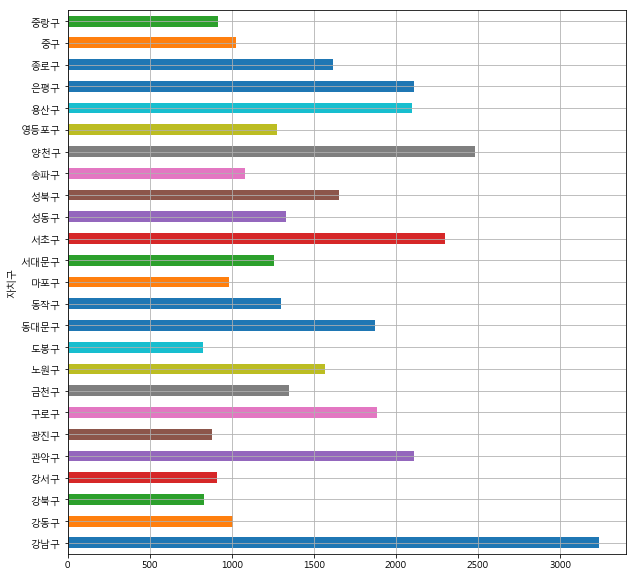

In [73]:
plt.figure()
#차트 모양 : barh =>좌우 bar + horiz
data_result['cctv 소계'].plot( kind = 'barh',grid = True, figsize = (10,10))
plt.show()

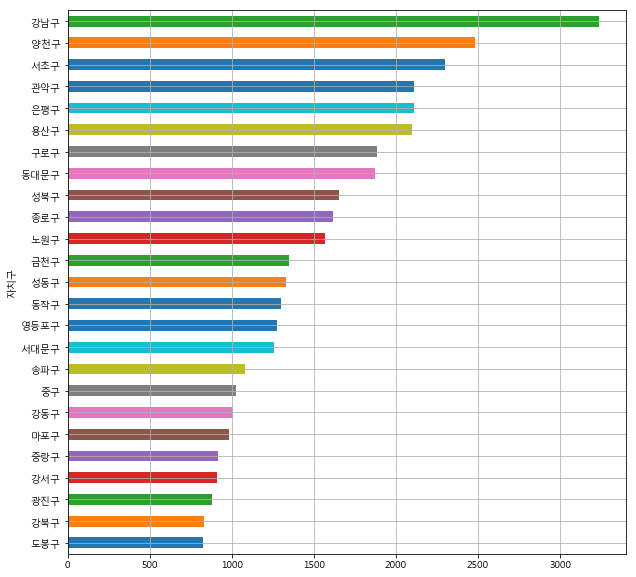

In [82]:
#소계가 많은 순으로 시각화 하시오.


data_result.sort_values(by='cctv 소계',ascending = True)['cctv 소계'].plot( kind = 'barh',grid = True, figsize = (10,10))
data_result['cctv 소계'].sort_values().plot( kind = 'barh',grid = True, figsize = (10,10))
plt.show()

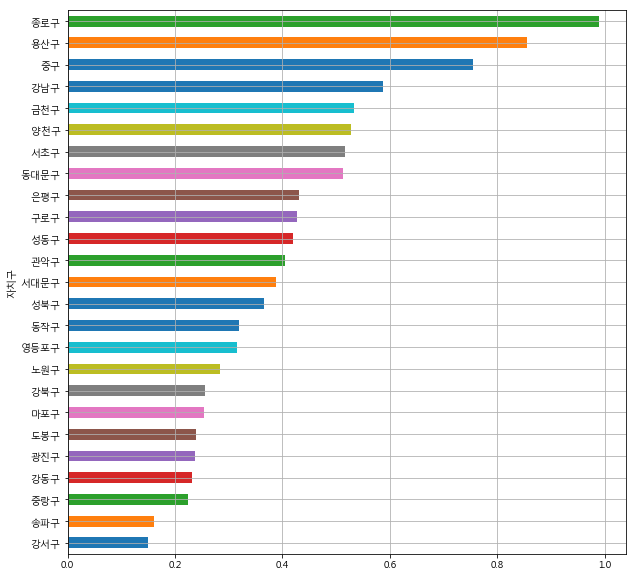

In [86]:
# 인구당 cctv 설치 비율
# CCTV 비율 = cctv 소계 / 인구수 * 100
data_result['cctv비율']=data_result['cctv 소계'] / data_result['인구수'] * 100
data_result['cctv비율'].sort_values().plot( kind = 'barh',grid = True, figsize = (10,10))
plt.show()
# 종로구가 인구대비 가장 많이 cctv를 설치한 지역
# 인구대비 설치 비율이 적절한지 판단 -> 적절한 설치 비율을 찾아야한다.


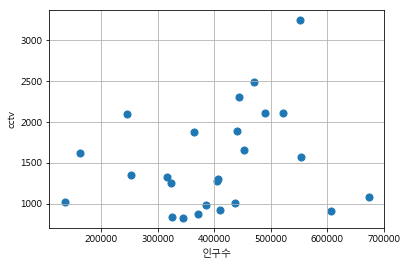

In [89]:
# x 축은 인구수, y축은 cctv수는 분포도 표현
plt.scatter(data_result['인구수'],data_result['cctv 소계'],s = 50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [91]:
# numpy에서 지원되는 함수를 이용하여 
#인구수: 입력 소계: 출력 => 이것을 만족하는 함수(모델)을 생성
# 함수를 1차, 2차, 3차, ....(1차만 수행)
fp1 = np.polyfit(data_result['인구수'],data_result['cctv 소계'],1)
fp1
#[기울기,정편]


array([1.08389848e-03, 1.07787951e+03])

In [93]:
# 함수 생성
f1 = np.poly1d(fp1)
f1

poly1d([1.08389848e-03, 1.07787951e+03])

In [95]:
# x 값 100000~700000 사이 100씩 증가
x = np.linspace(100000,700000.100)

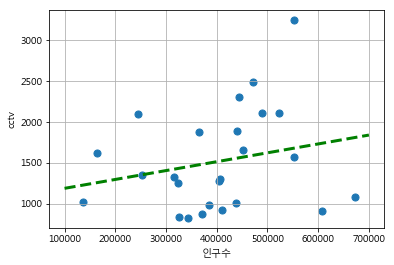

In [96]:
#시각화
plt.scatter(data_result['인구수'],data_result['cctv 소계'],s = 50)
#인구대비 cctv의 관계를 1차함수로 표현한 선
plt.plot(x, f1(x), ls ='dashed', lw = 3 ,color = 'g')

plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

- 1차함수 직선은 전체의 대표값
- 40만명 기준 적절한 cctv 설치 대수 1500대를 평균적으로 적절하다고 본다.
- 데이터 변곡점에 어떤 자치구의 데이터인지 마킹
- 오차율을 계산해서 데이터 포함.
- 칼라바 및 칼라맵을 사용하여 데이터의 속성 표현


In [103]:
# 오차율 계산
data_result['오차'] = np.abs(data_result['cctv 소계']-f1(data_result['인구수']))
df_sort =  data_result.sort_values(by='오차',ascending=False)
df_sort.head()


,cctv 소계,최근 증가율(%),최근 증가율3(%),인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,
강남구,3238,150.619195,162.277027,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
양천구,2482,34.671731,36.552997,471026,467151,3875,56742,0.822672,12.046469,0.526935,893.576120
강서구,911,134.793814,169.534488,606981,600257,6724,78042,1.107778,12.857404,0.150087,824.785298
용산구,2096,53.216374,57.106460,245245,229677,15568,37331,6.347938,15.221921,0.854656,752.299803
서초구,2297,63.371266,67.878468,443989,439844,4145,54614,0.933582,12.300755,0.517355,737.881483


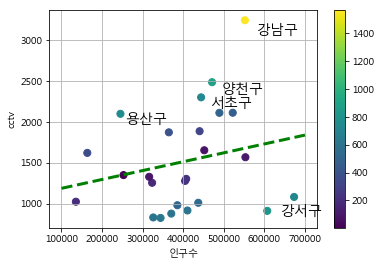

In [110]:
#시각화
plt.scatter(data_result['인구수'],data_result['cctv 소계'],s = 50,c = data_result['오차'] )
#인구대비 cctv의 관계를 1차함수로 표현한 선
plt.plot(x, f1(x), ls ='dashed', lw = 3 ,color = 'g')

for n in range(5):
    plt.text(df_sort['인구수'][n] *1.05,df_sort['cctv 소계'][n] *0.95,df_sort.index[n],fontsize=14)


plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.colorbar()
plt.show()

In [108]:
data_result.loc['강남구','인구수']

551888

In [111]:
# 결과 저장
data_result.to_csv('./data/s_cctv_pop.csv',sep = ',' ,encoding = 'utf-8')